# Generating Data
Lets say you want to generate synthetic data of the number of new visitors to an Emergency Department over time.  
based on the mean number of visitors
for that we would need to 
- Create the date range
- Create the random data based on the poisson distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

### The date range
use the `date_range()` function see [docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)


be aware of american formatting

In [2]:
pd.date_range(start='1/1/2018', end='1/08/2018')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

I would strongly suggest that you use the formatt year first.

In [3]:
pd.date_range(start='2023-01-01', end='2023-01-04')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'], dtype='datetime64[ns]', freq='D')

You can use freq to say that we want hourly data

In [4]:
pd.date_range(start='2023-01-01', end='2023-01-04', freq="h")

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               '2023-01-01 10:00:00', '2023-01-01 11:00:00',
               '2023-01-01 12:00:00', '2023-01-01 13:00:00',
               '2023-01-01 14:00:00', '2023-01-01 15:00:00',
               '2023-01-01 16:00:00', '2023-01-01 17:00:00',
               '2023-01-01 18:00:00', '2023-01-01 19:00:00',
               '2023-01-01 20:00:00', '2023-01-01 21:00:00',
               '2023-01-01 22:00:00', '2023-01-01 23:00:00',
               '2023-01-02 00:00:00', '2023-01-02 01:00:00',
               '2023-01-02 02:00:00', '2023-01-02 03:00:00',
               '2023-01-02 04:00:00', '2023-01-02 05:00:00',
               '2023-01-02 06:00:00', '2023-01-02 07:00:00',
               '2023-01-

Lets store this in a variable that I will make the index of my Data Frame

In [5]:
idx = pd.date_range(start='2023-01-01', end='2023-01-04', freq="h")

ok lets generate some ramdom data (the same lenght of the idx)


In [6]:
rng = np.random.default_rng()

In [7]:
df = pd.DataFrame(index = idx, data = rng.random(len(idx)), columns=["admissions"])
df.head(3)

,admissions
2023-01-01 00:00:00,0.133426
2023-01-01 01:00:00,0.215652
2023-01-01 02:00:00,0.060998


Ok that does not look like proper data. (hard to treat .3 of a person :) )  
so we need a discrete set of random numbers that match a mean....... so we use the *poisson distribution*  

see [docs](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html)  
also more information https://en.wikipedia.org/wiki/Poisson_distribution


In [8]:
mean_admissions = 15


we will use poisson distribution  
`poisson(lam=the_mean, size= number_to_return)`

In [9]:
df = pd.DataFrame(index = idx, data = rng.poisson(lam=mean_admissions, size= len(idx)), columns=["admissions"])
df.head(3)

,admissions
2023-01-01 00:00:00,19
2023-01-01 01:00:00,12
2023-01-01 02:00:00,11


<Axes: xlabel='None', ylabel='admissions'>

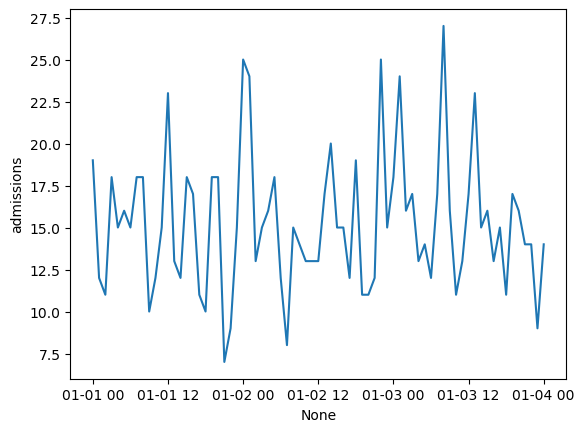

In [10]:
sns.lineplot(data=df,x = df.index, y="admissions")

In [11]:
df["admissions"].mean()

15.246575342465754

#### This does not take into account the time of the day 
We can pass in an array into lam to reflect the changing averages though out the day


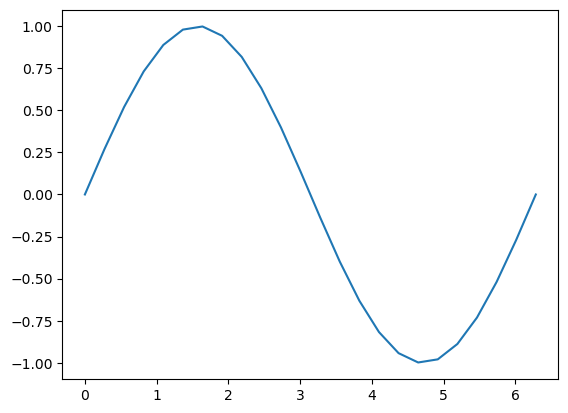

In [12]:
x = np.linspace(0.0, 2*np.pi, 24)
means = np.sin(x)
plt.plot(x, means)

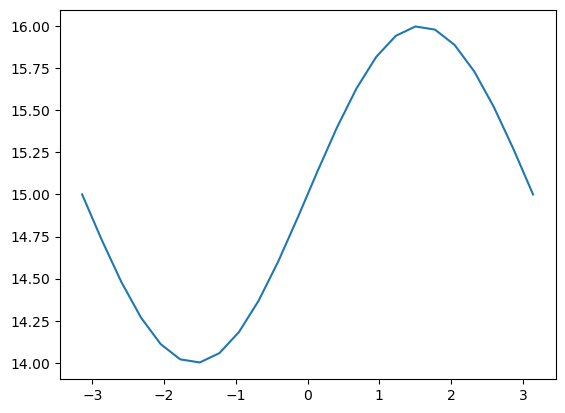

In [13]:

x = np.linspace(-np.pi, np.pi, 24)
means = np.sin(x) +15
plt.plot(x, means)

In [14]:
df = pd.DataFrame(index = idx, data = rng.poisson(lam=means, size= len(idx)), columns=["admissions"])
df.head(3)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (73,) and arg 1 with shape (24,).

In [ ]:
len(idx)

In [ ]:
#x = np.linspace(-np.pi, 3*np.pi, len(73))
number_ofdays = len(idx)/24
multiplier =( number_ofdays *2) -1
x = x = np.linspace(-np.pi, multiplier*np.pi , len(idx))
admissions_means = (np.sin(x) * (mean_admissions/2)) + mean_admissions
import matplotlib.pylab as plt
plt.plot(x, admissions_means)


In [ ]:
df = pd.DataFrame(index = idx, data = rng.poisson(lam=admissions_means, size= len(idx)), columns=["admissions"])
df.head(3)

In [ ]:
sns.lineplot(data=df,x = df.index, y="admissions")

### References
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html
- https://en.wikipedia.org/wiki/Poisson_distribution
- https://www.w3schools.com/python/numpy/numpy_random_poisson.asp
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html